In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
full=cv2.imread('Computer-Vision-with-Python/DATA/sammy.jpg')
full=cv2.cvtColor(full,cv2.COLOR_BGR2RGB)


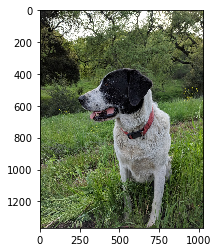

In [3]:
plt.imshow(full)

In [5]:
face=cv2.imread('Computer-Vision-with-Python/DATA/sammy_face.jpg')
face=cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

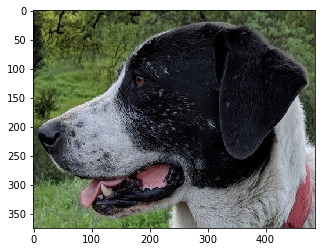

In [8]:
plt.imshow(face)

In [27]:
mask=np.zeros_like(face)
mask[:,:,1]=255

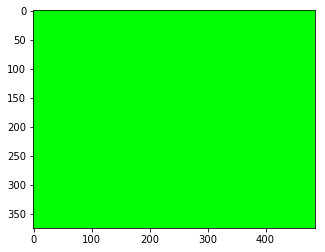

In [28]:
plt.imshow(mask)


In [30]:
mask.shape

(375, 486, 3)

In [31]:
mask

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

In [7]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

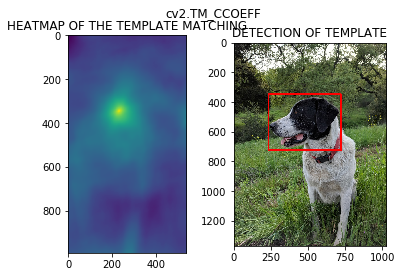

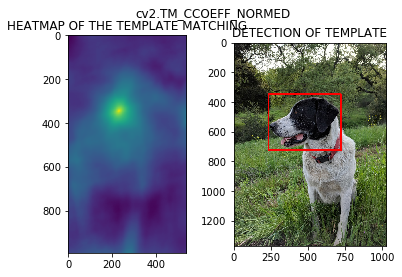

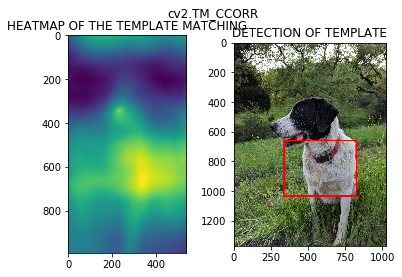

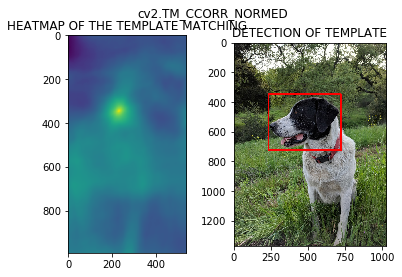

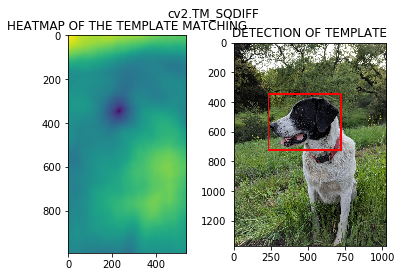

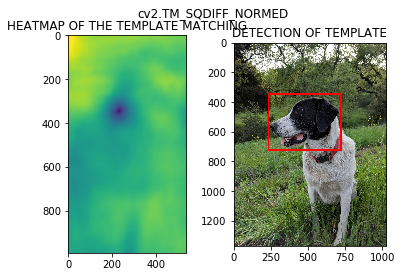

In [11]:
for m in methods:
    
    #create a copy
    full_copy=full.copy()
    
    method=eval(m)
    #template matching
    
    res=cv2.matchTemplate(full_copy,face,method)
    min_value,max_value,min_loc,max_loc=cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left=min_loc #(x,y)
    else:
        top_left=max_loc
        
    height,width,channels=face.shape
    bottom_right=(top_left[0]+width,top_left[1]+height)
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
    
    #plot and show the images
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEATMAP OF THE TEMPLATE MATCHING')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATE')
    
    #TITLE WITH THE METHOD USED
    plt.suptitle(m)
    
    plt.show()
    print('\n')
    print('\n')
    